In [233]:
from math import factorial
from math import exp, pi, sqrt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import truncnorm
from scipy import stats
import scipy

from numpy import trapz

### Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) найдите:
1. ковариацию (смещённую и несмещённую) этих двух величин,
2. коэффициент корреляции Пирсона,
3. коэффициент корреляции Кендалла.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [234]:
sal = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [235]:
sal_mean = sal.mean()
ks_mean = ks.mean()
print(sal_mean, ks_mean)

101.4 709.9


In [236]:
def maex(ar):
    num = {}
    for el in ar:
        if el not in num:
            num[el] = 0
        num[el] += 1
    s=0
    for key in  num.keys():
        s = s +num[key]*key/len(ar) 
    maex = s
    return maex

In [237]:
maex(sal)

101.4

In [238]:
maex(ks)

709.9000000000001

In [239]:
cov  = (sal*ks).mean()-sal.mean()*ks.mean()
cov

9157.839999999997

In [240]:
cov  = maex(sal*ks)-maex(sal)*maex(ks)
cov

9157.839999999982

In [241]:
def var_(ar, m):
    s = 0
    s = sum((ar-m)**2)/len(ar)
    return s

In [242]:
sal_d = var_(sal, sal.mean())
sal_d

3494.6400000000003

In [243]:
print(sal.var(ddof=0))

3494.6400000000003


In [244]:
ks_d = var_(ks, ks.mean())
ks_d

30468.890000000007

In [245]:
r = cov/sqrt(ks_d*sal_d)
r

0.8874900920739144

In [246]:
np.cov(sal, ks)

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

In [247]:
np.cov(sal, ks)[0, 1] #несмещеннная оценка

10175.377777777776

In [248]:
np.cov(sal, ks, ddof=0), np.cov(sal, ks, ddof=0)[0, 1] #смещенная оцена

(array([[ 3494.64,  9157.84],
        [ 9157.84, 30468.89]]), 9157.84)

In [249]:
df = pd.DataFrame({'sal': sal, 'ks': ks}, columns=['sal', 'ks'])
df.head()

,sal,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459


In [250]:
ne_cov = df.cov().values[0, 1] #несмещенная оценка
ne_cov

10175.377777777776

In [251]:
df.corr()

,sal,ks
sal,1.00000,0.88749
ks,0.88749,1.00000


In [252]:
ks_n_std = ks.std(ddof=1) #несмещенная оценка стандартного отклонения (для небольших выборок)
ks_n_std

183.99544076477068

In [253]:
sal_n_std = sal.std(ddof=1)
sal_n_std

62.31318747531162

In [254]:
from itertools import combinations
def is_concordant(pair1: tuple, pair2: tuple) -> bool:
    """Являются ли две пары согласованными.
    """
    return (pair1[0] - pair2[0]) * (pair1[1] - pair2[1]) > 0

In [255]:
P = 0
Q = 0
for pair1, pair2 in combinations(zip(sal, ks), r=2):
    if is_concordant(pair1, pair2):
        P += 1
    else:
        Q += 1     
P, Q

(43, 2)

In [256]:
tau = (P - Q) / (P + Q)
tau   #коэффициент корреляции Кендалла.

0.9111111111111111

In [257]:
df.corr(method='kendall')

,sal,ks
sal,1.000000,0.911111
ks,0.911111,1.000000


### Задача 2

Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111

Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [258]:
IQ = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
IQ

array([131, 125, 115, 122, 131, 115, 107,  99, 125, 111])

In [328]:
mean_=IQ.mean()
mean_

118.1

In [260]:
df = pd.DataFrame({'IQ': IQ}, columns=['IQ'])
df.head()

,IQ
0,131
1,125
2,115
3,122
4,131


In [265]:
df.describe()

,IQ
count,10.000000
mean,118.100000
std,10.545668
min,99.000000
25%,112.000000
50%,118.500000
75%,125.000000
max,131.000000


In [269]:
loc = df[key].mean()
loc

118.1

In [319]:
std_ = df[key].std()
std_

10.54566788359614

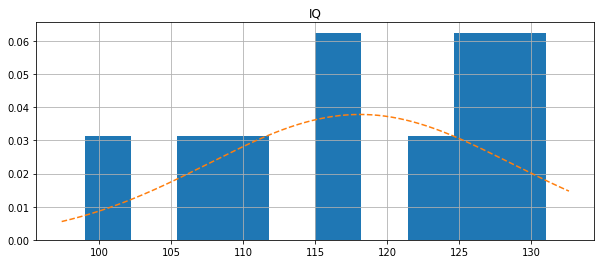

In [329]:
keys = ['IQ']

axes = df[keys].hist(density=True, figsize=(10, 4))

for key, ax in zip(keys, axes.flatten()):
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=mean_, scale=std_)
    
    ax.plot(x, y, linestyle='dashed')

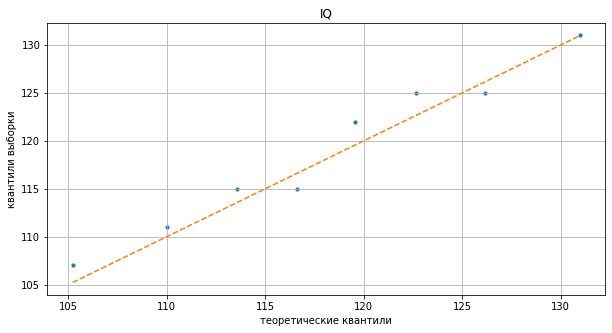

In [365]:
#fig, axes = plt.subplots(ncols=2)
fig, ax = plt.subplots(ncols=1)
fig.set_size_inches(10, 5)
#for key, ax in zip(keys, axes.flatten()):
for key in keys :
    samples = df[key]
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=mean_, scale=std_)
    y = np.quantile(samples, interval)
    ax.scatter(x, y, s=10)
    ax.plot(x, x, color='C1', linestyle='dashed')
    ax.set_title(key)
    ax.grid(True)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

In [420]:
alpha = 0.95  # надежность

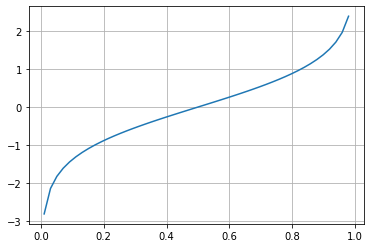

In [452]:
x = np.linspace(-1, 1,100)
t1 = scipy.stats.t.ppf(x, len(IQ)-1)
import matplotlib.pyplot as plt
plt.plot(x, t1)
plt.grid(True)
plt.show()

Найдем значение критерия Стьюдента при условии, что под надежностью понимаем   удвоенную площадь распределения Стьюдента отсекаемую значением  статистики t слева и справа, тогда в формулу поставим значение 0.975

In [444]:
t = scipy.stats.t.ppf(0.975, len(IQ)) #статистика T
t

2.2281388519649385

In [445]:
mean_-(t*std_)/((len(IQ)**0.5)) #нижняя граница с надежностью 0.95

110.66952903683091

In [446]:
mean_+(t*std_)/((len(IQ)**0.5)) #верхняя граница с надежностью 0.95

125.53047096316908

### Задача 3

Известно, что рост футболистов в сборной распределён нормально с известной дисперсией 25. На выборке объёма 27 выборочное среднее составило 174.2. Найдите доверительный интервал для математического ожидания с надёжностью 0.95.

In [447]:
std = 25**(1/2) #сигма генеральной совокупности
n = 27
mean = 174.2
alpha = 0.05/2

In [450]:
t = 1.96 #, т.к. распределение нормальное

In [451]:
mean-(z_t*std/(27**0.5)), mean+(z_t*std/(27**0.5))

(172.31398912064722, 176.08601087935276)